### This notebook downloads macroeconomic variables from worldbank data.
#### There are 89 datasets available from which we will mainly just use WDI.

In [10]:
# !pip install wbgapi
import wbgapi as wb
import pandas as pd
import seaborn as sns
import os

In [59]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2022-12-22
3,Worldwide Governance Indicators,WGI,3,2022-09-23
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-01-31
15,Global Economic Monitor,GEM,3,2020-07-27


There are 1442 different series to choose from. ```wb.series.info()``` shows a comprehensive list of all of them. 


In [ ]:
#wb.series.info() 

The variables chosen are GDP (constant 2015 US$)(NY.GDP.MKTP.KD), GNI (constant 2015 US$)(NY.GNP.MKTP.KD), Total population (SP.POP.TOTL), Urban population(% of total population)(SP.URB.TOTL.IN.ZS)

In [38]:
#population for all years by default
raw_df = wb.data.DataFrame(['NY.GDP.MKTP.KD', 'SP.POP.TOTL','SP.URB.TOTL.IN.ZS', 'NY.GNP.MKTP.KD'], mrv=32)

In [39]:
raw_df

YR1990        YR1991        YR1992  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     1.577581e+09  1.703201e+09  1.803390e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        6.571200e+04  6.786400e+04  7.019200e+04   
        SP.URB.TOTL.IN.ZS  5.031900e+01  5.030400e+01  4.999800e+01   
AFE     NY.GDP.MKTP.KD     4.105203e+11  4.109884e+11  4.029173e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.940700e+01  3.898900e+01  3.851400e+01   
ZWE     NY.GDP.MKTP.KD     1.667349e+10  1.759583e+10  1.600947e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.011389e+07  1.037782e+07  1.064150e+07   
        SP.URB.TOTL.IN.ZS  2.898800e+01  2.973800e+01  3.049900e+01   

                                 YR1993        YR1994        YR1995  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     1.935176e+09  2.093936e+09  2.147271e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        7.236000e+04  7.471000e+04  7.705000e+04   
        SP.URB.TOTL.IN.ZS  4.958800e+01  4.917700e+01  4.876700e+01   
AFE     NY.GDP.MKTP.KD     4.013551e+11  4.094805e+11  4.270826e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.804200e+01  3.757200e+01  3.710400e+01   
ZWE     NY.GDP.MKTP.KD     1.617780e+10  1.767185e+10  1.769978e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.079492e+07  1.085859e+07  1.099404e+07   
        SP.URB.TOTL.IN.ZS  3.094000e+01  3.133500e+01  3.173200e+01   

                                 YR1996        YR1997        YR1998  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     2.172733e+09  2.325843e+09  2.372174e+09   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        7.941700e+04  8.185800e+04  8.435500e+04   
        SP.URB.TOTL.IN.ZS  4.835600e+01  4.794600e+01  4.753600e+01   
AFE     NY.GDP.MKTP.KD     4.502904e+11  4.702512e+11  4.789321e+11   
...                                 ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.663800e+01  3.617600e+01  3.571600e+01   
ZWE     NY.GDP.MKTP.KD     1.953360e+10  2.005722e+10  2.063591e+10   
        NY.GNP.MKTP.KD              NaN           NaN           NaN   
        SP.POP.TOTL        1.117817e+07  1.136240e+07  1.154836e+07   
        SP.URB.TOTL.IN.ZS  3.213200e+01  3.253400e+01  3.293900e+01   

                                 YR1999  ...        YR2012        YR2013  \
economy series                           ...                               
ABW     NY.GDP.MKTP.KD     2.401542e+09  ...  2.689383e+09  2.862306e+09   
        NY.GNP.MKTP.KD              NaN  ...           NaN           NaN   
        SP.POP.TOTL        8.686700e+04  ...  1.021120e+05  1.028800e+05   
        SP.URB.TOTL.IN.ZS  4.712700e+01  ...  4.295700e+01  4.299000e+01   
AFE     NY.GDP.MKTP.KD     4.916348e+11  ...  8.283786e+11  8.633474e+11   
...                                 ...  ...           ...           ...   
ZMB     SP.URB.TOTL.IN.ZS  3.525800e+01  ...  4.035400e+01  4.086500e+01   
ZWE     NY.GDP.MKTP.KD     2.046715e+10  ...  1.868365e+10  1.928092e+10   
        NY.GNP.MKTP.KD              NaN  ...  1.681225e+10  1.755906e+10   
        SP.POP.TOTL        1.171645e+07  ...  1.326533e+07  1.355542e+07   
        SP.URB.TOTL.IN.ZS  3.334700e+01  ...  3.283400e+01  3.265400e+01   

                                 YR2014        YR2015        YR2016  \
economy series                                                        
ABW     NY.GDP.MKTP.KD     2.861720e+09  2.963128e+09  3.025850e+09   
        NY.GNP.MKTP.KD              NaN  2.838380e+09      

In [56]:
derived_df = raw_df.stack().unstack('series')
derived_df.columns = ["gdp", "GNI", "total_population","urban_population"]
derived_df

gdp           GNI  total_population  urban_population
economy                                                                       
ABW     YR1990  1.577581e+09           NaN           65712.0            50.319
        YR1991  1.703201e+09           NaN           67864.0            50.304
        YR1992  1.803390e+09           NaN           70192.0            49.998
        YR1993  1.935176e+09           NaN           72360.0            49.588
        YR1994  2.093936e+09           NaN           74710.0            49.177
...                      ...           ...               ...               ...
ZWE     YR2017  2.096487e+10  1.859457e+10        14751101.0            32.237
        YR2018  2.201518e+10  2.144035e+10        15052184.0            32.209
        YR2019  2.062108e+10  2.018540e+10        15354608.0            32.210
        YR2020  1.900914e+10  1.848916e+10        15669666.0            32.242
        YR2021  2.061884e+10  2.000388e+10        15993524.0            32.303

[8480 rows x 4 columns]

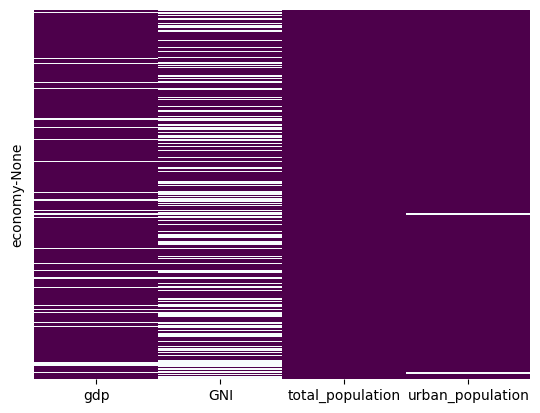

In [57]:
sns.heatmap(derived_df.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r');

In [58]:
percent_missing = derived_df.isnull().sum() * 100 / len(derived_df)

missing_value_df = pd.DataFrame({'column_name': derived_df.columns,'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df

,column_name,percent_missing
GNI,GNI,37.653302
gdp,gdp,8.360849
urban_population,urban_population,0.754717
total_population,total_population,0.000000


### We restrict the dataset to the countries to be used in the analysis

In [50]:
path = '/Users/ramzi.chariag/Documents/CEU/PhD/gnn_chapter-main/'
nodes = pd.read_csv(path + r'input_datasets/cepii_node.csv')
nodes

,iso2,iso3,cnum,country,pays,area,dis_int,landlocked,continent,city_en,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,AD,AND,20,Andorra,Andorre,453,8.005398,0.0,Europe,Andorra la Vella,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,ARE,784,United Arab Emirates,Emirats arabes unis,83657,108.788994,0.0,Asia,Abu Dhabi,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,AFG,4,Afghanistan,Afghanistan,652225,303.761350,1.0,Asia,Kabul,...,Uzbek,NaN,NaN,NaN,NaN,NaN,NaN,GBR,NaN,NaN
3,AG,ATG,28,Antigua and Barbuda,Antigua-et-Barbuda,442,7.907605,0.0,America,Saint John's,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
4,AI,AIA,660,Anguilla,Anguilla,102,3.798690,0.0,America,The Valley,...,NaN,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0.0,Africa,Cape Town,...,Shoto,NaN,NaN,GBR,NLD,NaN,NaN,NaN,NaN,NaN
234,ZA,ZAF,711,South Africa,Afrique du Sud,1219912,415.430200,0.0,Africa,Pretoria,...,Shoto,NaN,NaN,GBR,NLD,NaN,NaN,NaN,NaN,NaN
235,ZM,ZMB,894,Zambia,Zambie,752614,326.302150,1.0,Africa,Lusaka,...,Tonga,NaN,NaN,GBR,NaN,NaN,NaN,NaN,NaN,NaN
236,ZR,ZAR,180,Congo (Democratic Republic of the),"Congo, Rép. dém. du",2345410,576.027470,0.0,Africa,Kinshasa,...,Luba-Kasai,French,NaN,BEL,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
countries = nodes['iso3'].tolist()

In [52]:
restricted_raw = wb.data.DataFrame(['NY.GDP.MKTP.KD', 'SP.POP.TOTL','SP.URB.TOTL.IN.ZS', 'NY.GNP.MKTP.KD'], countries, range (1995,2019))

In [53]:
derived_df = restricted_raw.stack().unstack('series')
derived_df.columns = ["gdp", "GNI", "total_population","urban_population"]

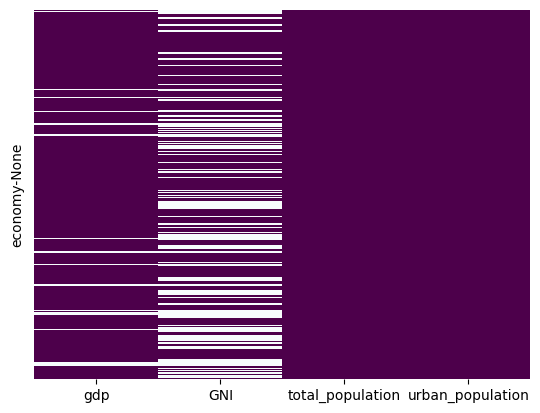

In [54]:
sns.heatmap(derived_df.isnull(), yticklabels=False,cbar=False, cmap='BuPu_r');

#### Percentage of missing values for each variable:

In [55]:
percent_missing = derived_df.isnull().sum() * 100 / len(derived_df)

missing_value_df = pd.DataFrame({'column_name': derived_df.columns,'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)

missing_value_df

,column_name,percent_missing
GNI,GNI,35.092127
gdp,gdp,5.527638
total_population,total_population,0.000000
urban_population,urban_population,0.000000
